# Probability, Combinations, & Permutations
* basic probability
* independent vs. dependent
* permutations
* combinations

## Explore independent/dependent events, scenarios involving multiple events, and the concept of expected value

In [1]:
import numpy as np
import pandas as pd

### Standard 52-card deck

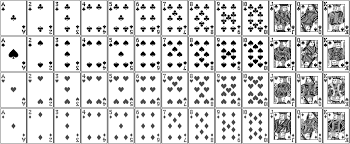

### The probability of drawing a King
* 4 Kings
* P(A) = 4 / 52

In [3]:
cards = 52
Kings = 4
Aces = 4
Queens = 4

King_prob = 4 / 52

print('Probability of drawing a King:', King_prob)
print('Percent Chance of drawing a King:', str(King_prob * 100) + '%')

Probability of drawing a King: 0.07692307692307693
Percent Chance of drawing a King: 7.6923076923076925%


### Assign Variables for the other events

In [4]:
hearts = 13
spades = 13
diamonds = 13
clubs = 13

face_cards = 12

### Create a Function - to reveal the Probability of an Event
* event_probability( )
* add 2 arguments - event_outcomes, sample_space

In [5]:
def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space) * 100
    return round(probability, 3)

### Use Function for Percentage chance of drawing:
* a spade
* a Jack, Queen, or King
* a King of spades

In [6]:
spade_prob = event_probability(spades, cards)

face_prob = event_probability(face_cards, cards)

King_of_spades = 1
King_of_spades_prob = event_probability(King_of_spades, cards)

print('Chance of a spade:', str(spade_prob) + '%')
print('Chance of a face card:', str(face_prob) + '%')
print('Chance of King of spades:', str(King_of_spades_prob) + '%')

Chance of a spade: 25.0%
Chance of a face card: 23.077%
Chance of King of spades: 1.923%


# Permutations
* number of ways a subset (of a given size) can be arranged out of a given set
* ordering matters

### Formula - *n*P*k* = *n*! / (*n - k*)!
* n - total numbers to choose from
* k - numbers actually desired to choose from
* ! - indicated factorial (3! = 1 * 2 * 3)

### Example - number of permutations of Pocket Aces
* n - 4, all aces
* k - 2, can have 2 for pocket aces

In [7]:
import math

n = 4
k = 2
permutations = math.factorial(n) / math.factorial(n-k)

print(permutations)

12.0


# Combinations
* number of ways a subset (of a given size) can be drawn from a set
* ordering does Not matter

### Formula - *n*C*k* = (*n*! / (*n - k*)!) / *k*!, or
### Formula - *n*C*k* = *n*P*k* / *k*!
* without ordering, figure out the permutations and divide by the redundancies

### Example - number of combinations of possible starting hands dealt in Texas Hold'em
* n - 52, all possible cards
* k - 2, number of cards in hand

In [9]:
n = 52
k = 2

permutations = math.factorial(n) / math.factorial(n-k)
combinations = permutations / math.factorial(k)

print('Permutations:', permutations)
print('Combinations:', combinations)

Permutations: 2652.0
Combinations: 1326.0


# Event Probability - Independent vs. Dependent
* Independent - events of this nature, do Not affect the probability of other events
    * knowing if one event happened provides No information about the other event
* Dependent - events which influence the probability of other events
    * drawing a card from a deck, affects the probability of the remaining cards to be drawn
    
### Example - probability of drawing an ace (as the 2nd card), if a King or ace has already been drawn (as the 1st card)
* specify the sample space
* find probabilities for the 2 different scenarios

In [10]:
cards = 52
cards_drawn = 1
cards = cards - cards_drawn

aces = 4

ace_prob1 = event_probability(aces, cards)

aces_drawn = 1
aces = aces - aces_drawn

ace_prob2 = event_probability(aces, cards)

print(ace_prob1, ace_prob2)

7.843 5.882


* percent chance of drawing an ace, after having drawn a King - 7.845 %
* probability of drawing an ace, after having drawn an ace - 0.05882 %

### Example - probability of drawing Open-ended straight draw, as River card
* Hand - Jack & 10, both of hearts
* Community - 9 (diamonds), 3 (clubs), Queen (spades), 5 (hearts)
* probability of drawing any 8, or any King 

In [11]:
cards = 52
hole_cards = 2
turn_community_cards = 4
cards = cards - (hole_cards + turn_community_cards)

eights = 4
kings = 4

outs = eights + kings

river_straight_probability = event_probability(outs, cards)

print(river_straight_probability)

17.391


* probability of drawing an open-ended straight on the river - 17.391 %

# Multiple Events
* Calculating the probability of multiple events involves:
    * specify the number of events 
    * find the probability of each happening separately
    * multiply these probabilities together

### Mutually Exclusive Events
* when multiple events can Not both occur
* some event(s) "OR" some different event(s)
* calculating mutually exclusive events involves:
    * adding (rather than multiplying) the probability of each event
    
### Example - probability of drawing a spade, or diamond

In [14]:
cards = 52

spades = 13
diamonds = 13

spade_or_diamond = event_probability(spades, cards) + event_probability(diamonds, cards)

print(spade_or_diamond)

50.0


* percent chance of drawing a spade or a diamond - 50 %

### Example - probability of drawing an ace, King, or Queen

In [13]:
cards = 52 

aces = 4
kings = 4
queens = 4

ace_king_or_queen = event_probability(aces, cards) + event_probability(kings, cards) + event_probability(queens, cards)

print(ace_king_or_queen)

23.076


* percent chance of drawing an ace, King, or Queen - 23.076 %

### Non-mutually Exclusive Events
* these events both occur together
* calculating the probability involves:
    * adding the probabilities of each event, then subtracting the probability of both events (together) occurring
    
### Example - probability of drawing a diamond Or ace

In [17]:
cards = 52

diamonds = 13
aces = 4
ace_of_diamonds = 1

diamond_or_ace = event_probability(diamonds, cards) + event_probability(aces, cards) - event_probability(ace_of_diamonds, cards)

print(diamond_or_ace)

30.769


* percent chance of drawing an ace or a diamond - 30.769 %

### Example - probability of drawing a face card Or a red card

In [18]:
cards = 52

red_cards = 26
face_cards = 12
red_face_cards = 6

red_or_face_cards = event_probability(red_cards, cards) + event_probability(face_cards, cards) - event_probability(red_face_cards, cards)

print(red_or_face_cards)

61.539


* percent chance of drawing a face card or a red card - 61.539 %

### Intersection of Multiple Dependent Events
* probability of one event, and then another event (given the 1st event)
* calculated by - probability of the 1st event multiplied by the probability of the 2nd event (conditioned on the 1st event)

### Example - probability of getting pocket aces

In [19]:
cards = 52

aces = 4

first_ace_probability = aces / cards

# second draw
cards = cards - 1

# second draw
aces = aces - 1

second_ace_probability = aces / cards

both_aces_probability = first_ace_probability * second_ace_probability * 100

print(both_aces_probability)

0.4524886877828055


* percent chance of being dealt pocket aces - 0.452 %

### Example - probability of hitting a flush draw, with the Turn and River remaining
* hand - ace (diamond), Queen (diamond)
* community - Jack (club), 9 (diamond), 4 (diamond)
* probability of drawing a diamond - However, this is a special case
    * there are 4 different possible outcomes
        * Turn-Diamond, River-Diamond - Turn-Diamond, River-Not - Turn-Not, River-Diamond - Turn-Not, River-Not
    * task here is figuring out the probability of the 1st 3 of those options
    * since all 4 options (probabilities) add up to 1, could simply subtract the probability of the last option from 1
    
#### Find the probability of Not getting a diamond on the Turn or River - subtract this probability from 1

In [20]:
# turn sample

cards = 52

hole_cards = 2
flop_community_cards = 3

cards = cards - (hole_cards + flop_community_cards)

diamonds = 13
diamonds_drawn = 4
non_diamonds_drawn = 1
outs = diamonds - diamonds_drawn

turn_non_diamonds = cards - outs - non_diamonds_drawn 

no_diamond_turn_probability = turn_non_diamonds / cards


# river sample

turn_community_card = 1
cards = cards - turn_community_card

river_non_diamonds = turn_non_diamonds - turn_community_card

no_diamond_river_probability = river_non_diamonds / cards


# probability of not getting a diamond on Turn or River

no_flush_probability = no_diamond_turn_probability * no_diamond_river_probability

# Subtract this probability from 1 to find - Probability of a diamond on the Turn or River

flush_probability = 1 - no_flush_probability

print(flush_probability)

0.38390379278445874


* in the above scenario, the percent chance of getting a flush draw on the Turn or River - 38.390 %

### Example - with the scenario above, probability of drawing a diamond on the Turn Or River 
* already have the probability of Not hitting the Flush (drawing No diamonds)
    * add this, to the probability of hitting on the Turn And River (Turn-diamond prob * River-diamond prob)
    * subtract this sum from 1

In [22]:
# turn sample

cards = 52

hole_cards = 2
flop_community_cards = 3

cards = cards - (hole_cards + flop_community_cards)

diamonds = 13
diamonds_drawn = 4

outs = diamonds - diamonds_drawn


# turn probability

diamond_turn_probability = outs / cards


# river sample

turn_diamonds = 1

cards = cards - turn_diamonds

river_diamonds = outs - turn_diamonds


# river probability

diamond_river_probability = river_diamonds / cards


# turn and river probability 

both_diamonds_probability = diamond_turn_probability * diamond_river_probability


# add both_diamonds_probability to no_flush_probability - subtract this sum from 1

one_diamond_probability = 1 - (no_flush_probability + both_diamonds_probability)


# this is the probability of a diamond on the Turn OR River - covering the other 2/4 outcomes

print(round(one_diamond_probability, 3))

0.351


* there is a 35.1 % of drawing a diamond on the Turn Or River

# Expected Value
* how much one expects to gain or lose on average
* calculated by multiplying the TotalValue * Probability
    * this could be the Total Value in the Pot * Probability of winning the pot

### Example - Should you call the following bet?
* Hand - ace (diamond), Queen (diamond)
* Community - Jack (clubs), 9 (diamond), 4 (diamond), 2 (spades)
* opponent - 2 (hearts), 2 (clubs)
* Total Pot - 60 dollars, Opponent bet - 20 dollars
    * Must bet 20 dollars to remain in the hand
    * if the expected value is Larger than the 20 - Should bet
    * if not - Should fold

### To win, any diamond is needed Except the Jack or 2
* the Jack or 2 would improve the opponent's hand to winning
* find the expected value

In [23]:
cards = 52

hole_cards = 2
opponents_hole_cards = 2 

turn_community_cards = 4

cards = cards - (hole_cards + opponents_hole_cards + turn_community_cards)


# Outcomes

diamonds = 13
diamonds_drawn = 4

# remember the two diamonds that help the opponent

diamond_non_outs = 2 

outs = diamonds - diamonds_drawn - diamond_non_outs


# win probability

win_probability = outs / cards


# expected value

pot = 60
expected_value = pot * win_probability


# Print expected value and whether to call or fold

call_amount = 20
if expected_value >= 20:
    print(round(expected_value, 2), 'Call')
else:
    print(round(expected_value, 2), 'Fold')

9.55 Fold


### Expected values is an important concept in poker - here, the potential gain of 9.55 dollars is substantially less than the 20 dollars required to make the call/take the risk